In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('../DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [4]:
#to check which column correlates more with benign_0__mal_1
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [5]:
X=df.drop('benign_0__mal_1', axis=1)
y= df['benign_0__mal_1']

In [6]:
#test_train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#normalization of our data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#creating our ANN
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))   #as we're only going to decide if the tumor is malignant or benign

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#we first will deliberately choose high number of epochs for training to overfit over the data then we'll use ealystopping
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
13/13 [==============================] - 3s 39ms/step - loss: 0.7031 - accuracy: 0.5427 - val_loss: 0.6676 - val_accuracy: 0.7193
Epoch 2/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6589 - accuracy: 0.6357 - val_loss: 0.6330 - val_accuracy: 0.8246
Epoch 3/600
13/13 [==============================] - 0s 9ms/step - loss: 0.6334 - accuracy: 0.7010 - val_loss: 0.5983 - val_accuracy: 0.8538
Epoch 4/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6092 - accuracy: 0.7286 - val_loss: 0.5651 - val_accuracy: 0.8304
Epoch 5/600
13/13 [==============================] - 0s 12ms/step - loss: 0.5797 - accuracy: 0.7839 - val_loss: 0.5310 - val_accuracy: 0.8538
Epoch 6/600
13/13 [==============================] - 0s 9ms/step - loss: 0.5494 - accuracy: 0.7563 - val_loss: 0.4991 - val_accuracy: 0.8713
Epoch 7/600
13/13 [==============================] - 0s 9ms/step - loss: 0.5181 - accuracy: 0.7990 - val_loss: 0.4694 - val_accuracy: 0.8947
Epoch 8/6

<AxesSubplot: >

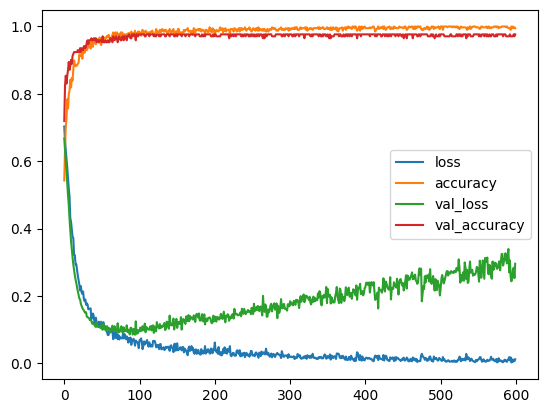

In [8]:
metrics_df= pd.DataFrame(model.history.history)
metrics_df.plot()

In [9]:
#we can clearly see the model has overfit over the data due to high no of epochs, now we'll use early stopping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [10]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))   #as we're only going to decide if the tumor is malignant or benign

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 2s 29ms/step - loss: 0.6626 - accuracy: 0.6482 - val_loss: 0.6415 - val_accuracy: 0.7135
Epoch 2/600
13/13 [==============================] - 0s 9ms/step - loss: 0.6499 - accuracy: 0.6583 - val_loss: 0.6121 - val_accuracy: 0.8246
Epoch 3/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6085 - accuracy: 0.7412 - val_loss: 0.5753 - val_accuracy: 0.8596
Epoch 4/600
13/13 [==============================] - 0s 10ms/step - loss: 0.5743 - accuracy: 0.7915 - val_loss: 0.5368 - val_accuracy: 0.8596
Epoch 5/600
13/13 [==============================] - 0s 9ms/step - loss: 0.5590 - accuracy: 0.7764 - val_loss: 0.4990 - val_accuracy: 0.8713
Epoch 6/600
13/13 [==============================] - 0s 9ms/step - loss: 0.5010 - accuracy: 0.8291 - val_loss: 0.4649 - val_accuracy: 0.9006
Epoch 7/600
13/13 [==============================] - 0s 9ms/step - loss: 0.4871 - accuracy: 0.8216 - val_loss: 0.4313 - val_accuracy: 0.9064
Epoch 8/60

<AxesSubplot: >

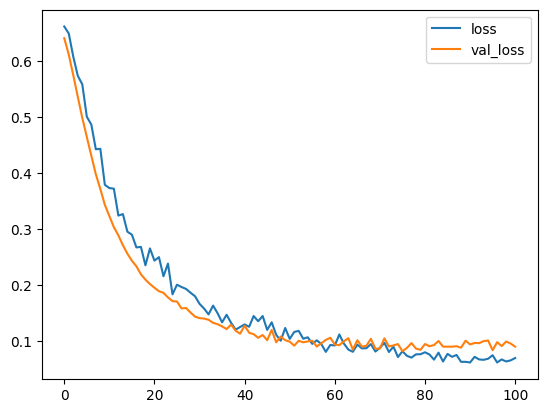

In [11]:
metrics_df= pd.DataFrame(model.history.history)
metrics_df[['loss', 'val_loss']].plot()

In [25]:
#evaluation
preds= model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test.values, preds))

6/6 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [21]:
preds.shape


(171, 1)

In [22]:
preds.reshape(171,)

array([4.37065773e-03, 9.92273033e-01, 9.92428780e-01, 7.67173767e-01,
       9.98485625e-01, 9.99629557e-01, 9.86793697e-01, 9.99366164e-01,
       9.77587342e-01, 5.23156887e-05, 9.99919951e-01, 9.82432067e-01,
       9.99164641e-01, 9.92284656e-01, 9.94338930e-01, 1.68565416e-03,
       9.97970998e-01, 9.93883967e-01, 9.98379767e-01, 9.98065829e-01,
       9.05205429e-01, 1.64113826e-05, 9.99501050e-01, 8.64132345e-01,
       9.97564971e-01, 9.35507342e-02, 9.95517254e-01, 9.99506533e-01,
       9.97498274e-01, 9.97266889e-01, 9.96466041e-01, 7.91860837e-03,
       9.97008204e-01, 5.22858045e-06, 9.86436486e-01, 1.30505161e-03,
       9.99906003e-01, 2.74142749e-05, 9.99302089e-01, 5.89168025e-03,
       9.99953747e-01, 9.94651556e-01, 9.99671578e-01, 6.34371042e-02,
       9.89962399e-01, 9.96224880e-01, 9.99146581e-01, 9.99742031e-01,
       7.86504184e-04, 9.97786343e-01, 8.03220464e-05, 4.54038644e-04,
       9.98892725e-01, 9.93070717e-05, 9.98253226e-01, 9.43521976e-01,
      

In [24]:
y_test.values

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
preds1= preds.reshape(171,)
preds1= pd.Series(preds1)
preds2= preds1.apply(lambda x: 1 if (x>0.5) else 0)

In [31]:
preds2

0      0
1      1
2      1
3      1
4      1
      ..
166    0
167    0
168    0
169    1
170    1
Length: 171, dtype: int64

In [34]:
preds2.values

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [35]:
print(confusion_matrix(y_test, preds2))

[[ 60   4]
 [  1 106]]


In [36]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

